In [78]:
import pandas as pd
import numpy as np
from scipy.signal import correlate
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from copy import deepcopy
from matplotlib import pyplot as plt
clf = LogisticRegression()

In [2]:
def prep(X):
    mean = np.mean(X, axis=1)[:, np.newaxis]
    X = X - mean
    power = np.sum(np.power(X, 2), axis=1)
    power[power==0] = 1
    power = np.sqrt(power)[:,np.newaxis]
    X = X / power
    return X

In [4]:
accuracy_score?

In [39]:
np.arange(len(y))[y==1]

array([    1,     2,     3, ..., 25963, 25965, 25966])

In [74]:
def search(X, y, n_series=500, n_win=10):
    best1 = -999
    for template_len in [3,5,10]:
        ids = np.random.choice(np.arange(len(y))[y==1], n_series)
        for k,idx in enumerate(ids):
            if (k % 100 == 1):
                print(template_len, k, idx)
            for i in np.random.choice(range(len(X[0])-template_len), n_win):
                template = X[idx, i:i+template_len].copy()
                template -= np.mean(template)
                power = np.sum(np.power(template,2))
                if (power == 0):
                    continue
                template /= np.sqrt(power)

                w = correlate(template[np.newaxis,:], X, mode='valid')[::-1]
                w = np.max(w, axis=1).reshape(-1,1)
                clf.fit(w,y)
                score = accuracy_score(y, clf.predict(w))

                if (score > best1):
                    best1 = score
                    best_template1 = template.copy()
                    print(template_len, idx, i, best1)

    return best_template1

In [76]:
np.random.seed(123)

y = pd.read_csv('train_labels.csv',index_col='sequence').values[:,0]

sensor = 'sensor_12'
series = pd.read_csv('train.csv',index_col=['sequence','subject','step'])[[sensor]]

X = series.values.reshape(-1,60)
X = prep(X)

template1 = search(X, y, n_series=100)
df = pd.DataFrame(template1, columns=['template'])
df.to_csv('template_'+sensor+'.csv', index=False)

rr = np.max(correlate(template1[np.newaxis,:],X,mode='valid')[::-1],axis=1)
df = pd.DataFrame(rr, columns=['corr'])
df.to_csv('template_corr_'+sensor+'.csv', index=False)

1 1 23217
2 5147 1 0.5807147258163894
2 1 20732
3 5255 19 0.6108672211953173
3 1 4260
3 16270 24 0.6114833641404805
3 15800 50 0.6117529266789895
5 1 2557
5 2557 11 0.6166820702402958
5 16756 16 0.6170671595810228
5 12523 4 0.6204944547134935
5 20610 25 0.6207255083179297
5 10473 13 0.6211105976586568
10 1 9063


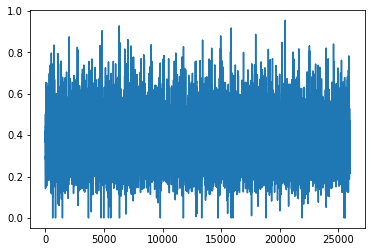

In [79]:
plt.plot(rr)

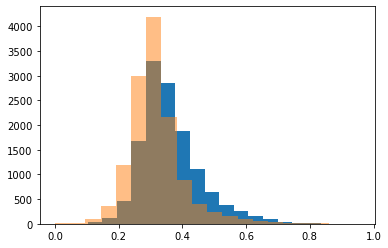

In [81]:
plt.hist(rr[y==1],bins=20);
plt.hist(rr[y==0],bins=20,alpha=0.5);

In [92]:
clf = LogisticRegression(n_jobs=2)

In [88]:
clf.fit(X,y)

LogisticRegression()

In [91]:
X.shape

(25968, 60)

In [89]:
clf.coef_

array([[ 0.00892306,  0.02737814,  0.0835098 , -0.07597832,  0.19012028,
         0.15193137,  0.04082124,  0.09291309,  0.01710128,  0.23676014,
         0.05447207, -0.0283229 ,  0.19333709, -0.00856902,  0.0449084 ,
         0.10043466, -0.00136997,  0.0926709 , -0.0423627 ,  0.05470305,
        -0.13499481,  0.05913483, -0.01379259, -0.077588  , -0.02382717,
        -0.18676947, -0.13171229, -0.06255444, -0.21116937, -0.10551959,
         0.08758037,  0.11616807,  0.11993351, -0.00768425, -0.14652055,
         0.2077929 ,  0.14408526,  0.12147445,  0.11924225,  0.05421263,
         0.15314897, -0.05521744,  0.11061695, -0.07058729, -0.06965112,
        -0.24812409, -0.01616489, -0.17118287,  0.02540929, -0.09239312,
        -0.15674726, -0.12869001, -0.16960759, -0.01844039,  0.09810847,
        -0.03852157,  0.05511491, -0.13920283, -0.03949454, -0.18924697]])

In [93]:
import os

In [94]:
np.__config__.show()

blas_info:
    libraries = ['cblas', 'blas', 'cblas', 'blas']
    library_dirs = ['/opt/anaconda3/envs/cs2020/lib']
    include_dirs = ['/opt/anaconda3/envs/cs2020/include']
    language = c
    define_macros = [('HAVE_CBLAS', None)]
blas_opt_info:
    define_macros = [('NO_ATLAS_INFO', 1), ('HAVE_CBLAS', None)]
    libraries = ['cblas', 'blas', 'cblas', 'blas']
    library_dirs = ['/opt/anaconda3/envs/cs2020/lib']
    include_dirs = ['/opt/anaconda3/envs/cs2020/include']
    language = c
lapack_info:
    libraries = ['lapack', 'blas', 'lapack', 'blas']
    library_dirs = ['/opt/anaconda3/envs/cs2020/lib']
    language = f77
lapack_opt_info:
    libraries = ['lapack', 'blas', 'lapack', 'blas', 'cblas', 'blas', 'cblas', 'blas']
    library_dirs = ['/opt/anaconda3/envs/cs2020/lib']
    language = c
    define_macros = [('NO_ATLAS_INFO', 1), ('HAVE_CBLAS', None)]
    include_dirs = ['/opt/anaconda3/envs/cs2020/include']
Supported SIMD extensions in this NumPy install:
    baseline = SSE,S

In [11]:
y.shape

(25968,)

In [27]:
x1 = np.array([0.1,2])
x2 = np.array([[3,4,5],[5,6,7]])

In [28]:
x1.shape, x1[np.newaxis,:].shape

((2,), (1, 2))

In [29]:
correlate(x1[np.newaxis,:],x2,mode='valid')

array([[14.6, 12.5],
       [10.4,  8.3]])

In [30]:
np.max(correlate(x1[np.newaxis,:],x2,mode='valid'), axis=1)

array([14.6, 10.4])